In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Titanic dataset from the specified paths
train_path = "/content/drive/MyDrive/Spring 2025/CS156/titanic/train.csv"
test_path = "/content/drive/MyDrive/Spring 2025/CS156/titanic/test.csv"

data = pd.read_csv(train_path)

# Selecting the dependent variable (Passenger Fare) and three independent variables
# Independent variables selected: Age, Pclass, and SibSp
# Handling missing values in the dataset
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define dependent (y) and independent (X) variables
y = data['Fare']
X = data[['Age', 'Pclass', 'SibSp']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficients: [ -0.22362759 -36.66747001   8.40609213]
Model Intercept: 119.90270454064947
Mean Squared Error: 976.5583799595778
R-squared: 0.3689158022459751


<ipython-input-1-3ce753f1d3ed>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Weights (W):
[[128.]
 [  0.]
 [-32.]
 [ -4.]]

Gradient:
[[ 139.0834]
 [4043.3692]
 [ 318.3834]
 [  41.5   ]]


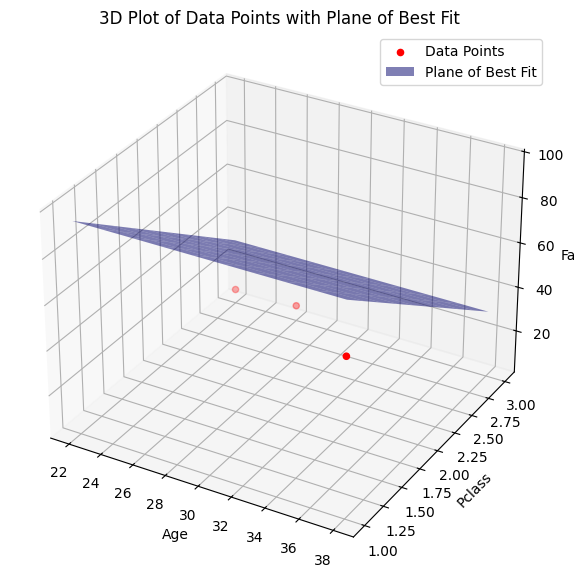

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create Example Data
X = np.array([
    [1, 22, 3, 1],  # Bias term, Age, Pclass, SibSp for data point 1
    [1, 38, 1, 0],  # Bias term, Age, Pclass, SibSp for data point 2
    [1, 26, 3, 0]   # Bias term, Age, Pclass, SibSp for data point 3
])
Y = np.array([
    [7.25],    # Fare for data point 1
    [71.2833], # Fare for data point 2
    [7.925]    # Fare for data point 3
])

# Step 2: Solve for Weights using Closed-Form Solution
X_T_X = np.dot(X.T, X)
X_T_Y = np.dot(X.T, Y)
W = np.dot(np.linalg.inv(X_T_X), X_T_Y)

print("Weights (W):")
print(W)

# Step 3: Compute the Gradient
gradient = -2 * np.dot(X.T, (Y - np.dot(X, W)))
print("\nGradient:")
print(gradient)

# Step 4: 3D Plot with Plane of Best Fit
# Extract Age, Pclass, and SibSp values for the plot
age = X[:, 1]
pclass = X[:, 2]
sibsp = X[:, 3]
fare = Y.flatten()

# Generate meshgrid for the plane
age_range = np.linspace(min(age), max(age), 10)
pclass_range = np.linspace(min(pclass), max(pclass), 10)
age_grid, pclass_grid = np.meshgrid(age_range, pclass_range)

# Calculate plane values (Fare) using weights
# Plane equation: Fare = W[0] + W[1]*Age + W[2]*Pclass + W[3]*SibSp
fare_plane = W[0] + W[1] * age_grid + W[2] * pclass_grid + W[3] * np.mean(sibsp)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(age, pclass, fare, color='red', label='Data Points')

# Plot the plane of best fit
ax.plot_surface(age_grid, pclass_grid, fare_plane, alpha=0.5, color='blue', label='Plane of Best Fit')

# Labels and Title
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
ax.set_title('3D Plot of Data Points with Plane of Best Fit')

# Show legend and plot
plt.legend()
plt.show()


<ipython-input-3-19e79795c0d4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing Age values


Model Coefficients: [ -0.22362759 -36.66747001   8.40609213]
Model Intercept: 119.90270454064947
Mean Squared Error: 976.5583799595778
R-squared: 0.3689158022459751


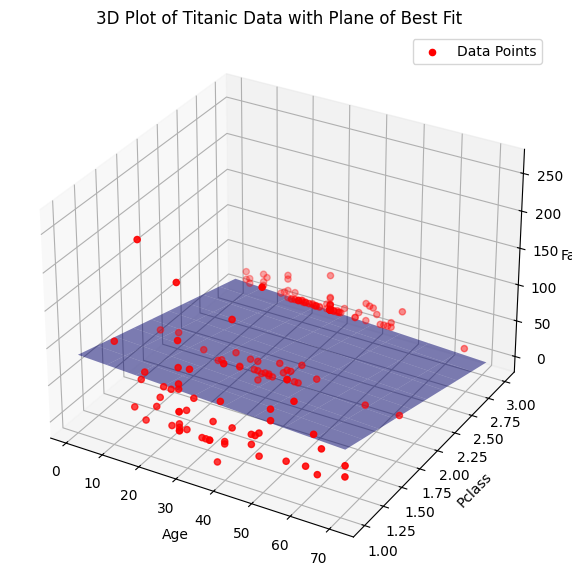

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Titanic dataset from the specified path
train_path = "/content/drive/MyDrive/Spring 2025/CS156/titanic/train.csv"
data = pd.read_csv(train_path)

# Selecting the dependent variable (Passenger Fare) and three independent variables
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing Age values
y = data['Fare']
X = data[['Age', 'Pclass', 'SibSp']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Extract coefficients and intercept for the plane equation
coefficients = model.coef_
intercept = model.intercept_

# Plotting 3D graph with the actual data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract data for plotting
age = X_test['Age']
pclass = X_test['Pclass']
sibsp = X_test['SibSp']
fare = y_test

# Scatter plot of actual data points
ax.scatter(age, pclass, fare, color='red', label='Data Points')

# Generate meshgrid for the plane
age_range = np.linspace(age.min(), age.max(), 10)
pclass_range = np.linspace(pclass.min(), pclass.max(), 10)
age_grid, pclass_grid = np.meshgrid(age_range, pclass_range)

# Calculate fare values for the plane of best fit
fare_plane = (coefficients[0] * age_grid +
              coefficients[1] * pclass_grid +
              coefficients[2] * sibsp.mean() +
              intercept)

# Plot the plane of best fit
ax.plot_surface(age_grid, pclass_grid, fare_plane, alpha=0.5, color='blue')

# Label axes and add title
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
ax.set_title('3D Plot of Titanic Data with Plane of Best Fit')

# Show legend and plot
plt.legend()
plt.show()


<ipython-input-5-3d9045794b45>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


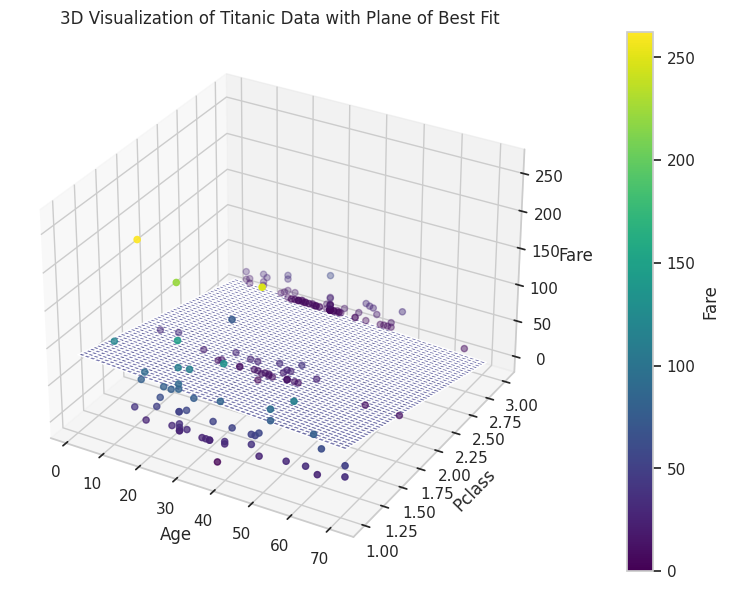

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
train_path = "/content/drive/MyDrive/Spring 2025/CS156/titanic/train.csv"
data = pd.read_csv(train_path)

# Fill missing values for 'Age'
data['Age'].fillna(data['Age'].median(), inplace=True)

# Select dependent variable (Fare) and independent variables (Age, Pclass, SibSp)
y = data['Fare']
X = data[['Age', 'Pclass', 'SibSp']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients and intercept for the plane of best fit
coefficients = model.coef_
intercept = model.intercept_

# Prepare data for visualization
age_range = np.linspace(X_test['Age'].min(), X_test['Age'].max(), 50)
pclass_range = np.linspace(X_test['Pclass'].min(), X_test['Pclass'].max(), 50)
age_grid, pclass_grid = np.meshgrid(age_range, pclass_range)

# Compute the plane of best fit (predicted Fare)
fare_plane = (coefficients[0] * age_grid +
              coefficients[1] * pclass_grid +
              coefficients[2] * X_test['SibSp'].mean() +
              intercept)

# Initialize a Seaborn scatter plot
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the test data
scatter = ax.scatter(X_test['Age'], X_test['Pclass'], y_test, c=y_test, cmap='viridis', label='Test Data Points')

# Plot the plane of best fit
ax.plot_surface(age_grid, pclass_grid, fare_plane, alpha=0.5, color='blue', label='Plane of Best Fit')

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
ax.set_title('3D Visualization of Titanic Data with Plane of Best Fit')

# Add color bar for scatter points
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Fare')

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the Titanic dataset
train_path = "/content/drive/MyDrive/Spring 2025/CS156/titanic/train.csv"
data = pd.read_csv(train_path)

# Fill missing values for 'Age'
data['Age'].fillna(data['Age'].median(), inplace=True)

# Select dependent and independent variables
y = data['Fare'].values
X = data[['Age', 'Pclass', 'SibSp']].values

# Add a bias term (intercept) to the design matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train the linear regression model
model = LinearRegression()
model.fit(X[:, 1:], y)  # Use sklearn to get coefficients for comparison

# Get coefficients and intercept
weights = np.append(model.intercept_, model.coef_)

# Predicted values
y_pred = np.dot(X, weights)

# Residuals
residuals = y - y_pred

# Sum of Squared Residuals (SSR)
SSR = np.sum(residuals ** 2)

# Sum of Absolute Residuals (SAR)
SAR = np.sum(np.abs(residuals))

print("Sum of Squared Residuals (SSR):", SSR)
print("Sum of Absolute Residuals (SAR):", SAR)


Sum of Squared Residuals (SSR): 1434956.5540335719
Sum of Absolute Residuals (SAR): 17434.879740685545


<ipython-input-6-3d43984feada>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


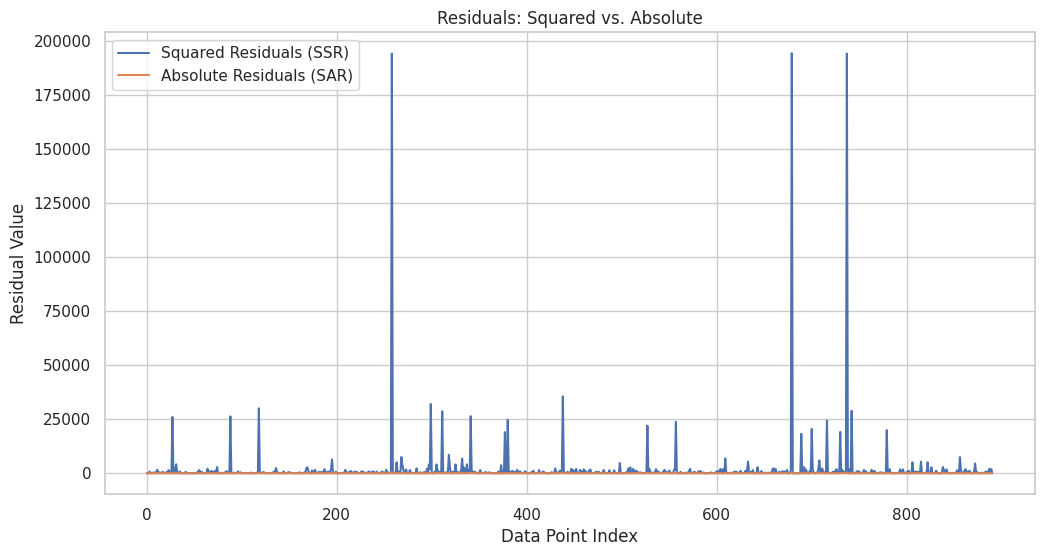

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residuals
residuals_squared = residuals ** 2
residuals_abs = np.abs(residuals)

# Create a dataframe for plotting
residuals_df = pd.DataFrame({
    'Index': np.arange(len(residuals)),
    'Squared Residuals': residuals_squared,
    'Absolute Residuals': residuals_abs
})

# Plot residuals
plt.figure(figsize=(12, 6))
sns.lineplot(x='Index', y='Squared Residuals', data=residuals_df, label='Squared Residuals (SSR)')
sns.lineplot(x='Index', y='Absolute Residuals', data=residuals_df, label='Absolute Residuals (SAR)')

plt.xlabel('Data Point Index')
plt.ylabel('Residual Value')
plt.title('Residuals: Squared vs. Absolute')
plt.legend()
plt.show()


/content/drive/MyDrive/Spring 2025/CS156/titanic/test.csv
/content/drive/MyDrive/Spring 2025/CS156/titanic/train.csv